In [1]:
from PIL import Image
import numpy as np

import imageio.v2 as iio
import matplotlib.pylab as plt


# vd2.1
img = Image.open('bird.png')
img.show()


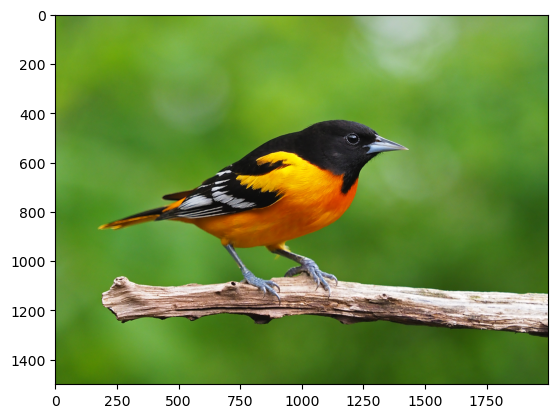

In [2]:
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

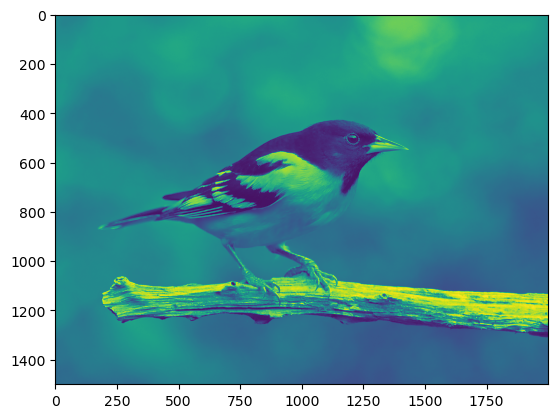

In [4]:
# vd2.3
data = iio.imread('bird.png', mode='L')
plt.imshow(data)
plt.show()

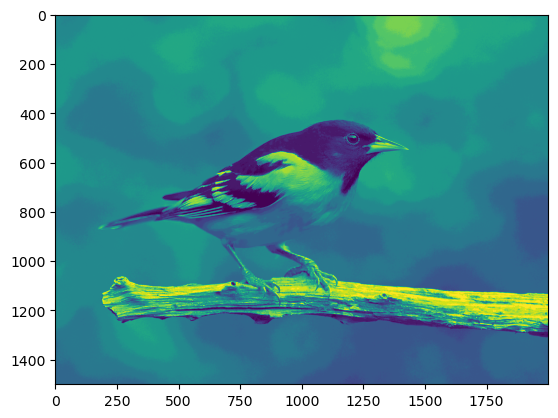

In [6]:
data = iio.imread('bird.png', mode='F').astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdf0.png', cl)
tmp = iio.imread('birdf0.png')
plt.imshow(tmp)
plt.show()

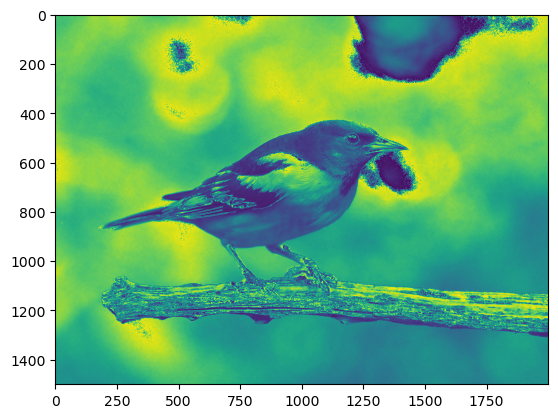

In [7]:
data = iio.imread('bird.png')
bdata = (data[:, :, 1] + data[:, :, 2])
plt.imshow(bdata)
plt.show()


In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)

b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)

c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)

d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)


(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


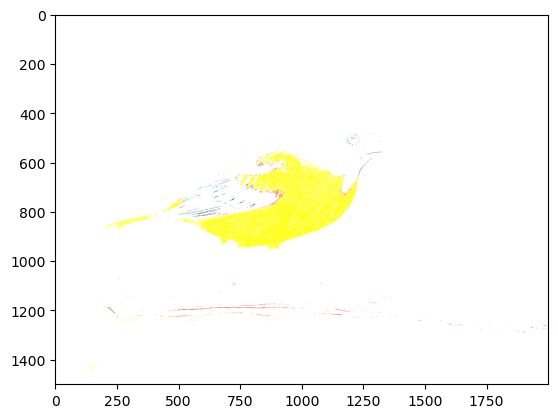

In [9]:
rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()


[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


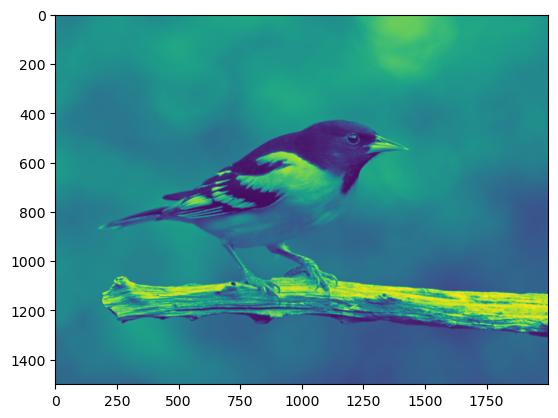

In [11]:
import scipy.ndimage as sn

a = iio.imread('bird.png', mode='F')

k = np.ones((5, 5)) / 25

b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('bird_mean_filter.png', b)

print(b)
plt.imshow(b)
plt.show()


[[118 118 118 ... 131 131 131]
 [118 118 119 ... 131 131 131]
 [119 119 119 ... 132 131 131]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  80  81  81]
 [ 89  88  89 ...  80  80  81]]


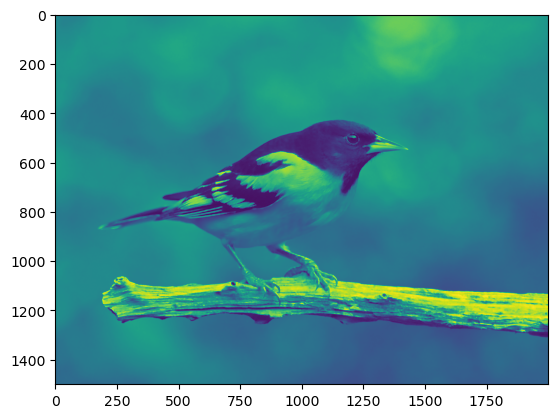

In [13]:
# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# performing median filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
## The pixels in the input image corresponding to the points to the
## footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.median_filter(a, size=5, footprint=None, output=None,
                    mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_median_filter.png', b)

# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()


[[121 121 121 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 ...
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]]


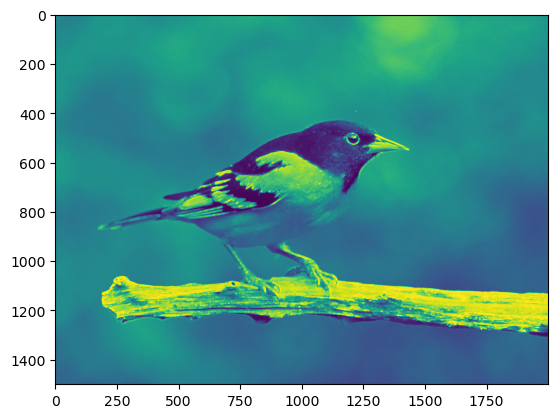

In [14]:
# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# performing maximum filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
## The pixels in the input image corresponding to the points to the
## footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.maximum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)

iio.imsave('bird_max_filter.png', b)

# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()


[[117 117 117 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 ...
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  78  78  78]]


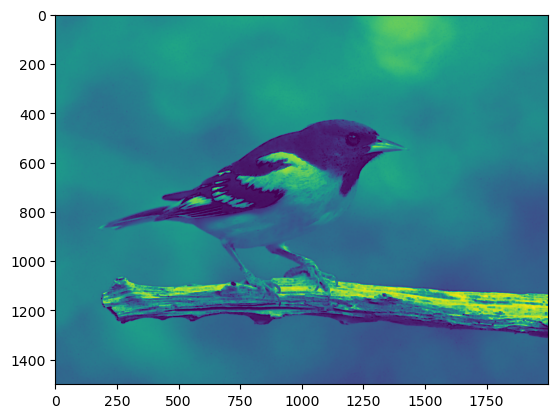

In [16]:
# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# performing minimum filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
## The pixels in the input image corresponding to the points to the
## footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.minimum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)

iio.imsave('bird_min_filter.png', b)

# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()


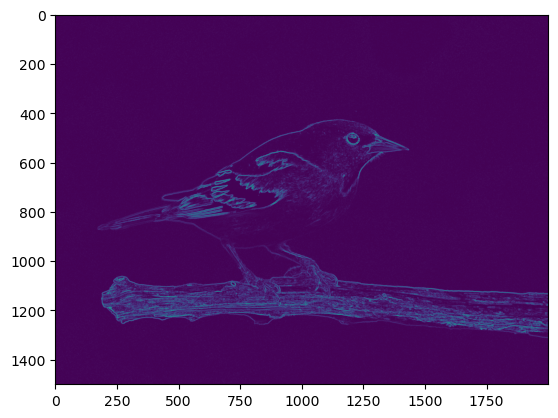

In [17]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F')

b = filters.sobel(a).astype(np.uint8)

iio.imsave('bird_sobel_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()


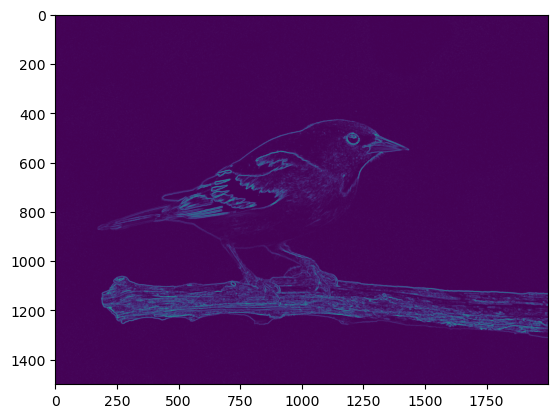

In [18]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F')

b = filters.prewitt(a).astype(np.uint8)

iio.imsave('bird_prewitt_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()


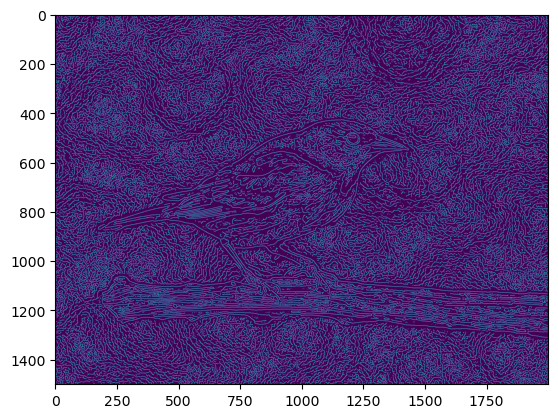

In [20]:
from skimage import feature

a = iio.imread('bird.png', mode='F')
b = feature.canny(a, sigma=3).astype(np.uint8)

iio.imsave('bird_candy_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

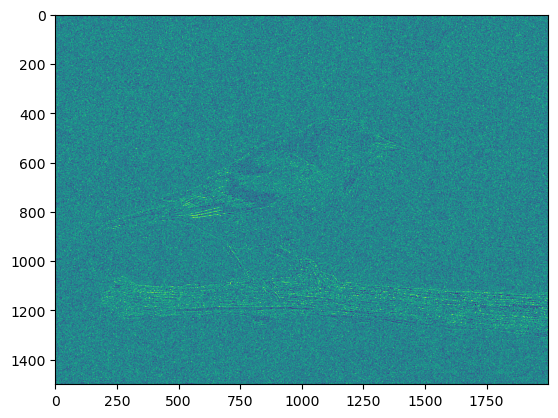

In [21]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F')
b = sn.laplace(a, mode='reflect').astype(np.uint8)

iio.imsave('bird_laplace_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()
    